## Overview
 i have decided to use this [dataset](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention)

# Steps to train an AI
1. Collecting Data
2. Preparing Data
3. Choosing a Model
4. Training the Model
5. Evaluating the Model
6. Making a prediction


okay then lets get started

1. Collecting Data:

    Bascily to train an Ai we need some kind of data on specific topics. for this we gonna use a csv file. The data set I am gonna used is [students' dropout and academic success](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention). When collecting your own data, ensure ethical standards are maintained. For more on ethical data collection, refer to [this article](https://online.hbs.edu/blog/post/data-ethics).



In [71]:
#This are all the modules we gonna use to prep and visualize the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Firstly we have to store the data/csv file in a variable 

In [72]:
data=pd.read_csv("dataset.csv")

Let get a peek on what the dataset has

In [73]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

This dataset has too many column which pandas is not showing us

In [75]:
#This method allow pandas to shown us all the column and rows it has
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [76]:
#This is better now
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,10,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,4,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,10,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Now we have our dataset let start preparing it

2. Preparing Data

    We explore the data, identifying any trends, correlations, or outliers. We deal with missing values, remove duplicates, and discard irrelevant data. Visualizations such as charts and graphs help in understanding the data better

In [77]:
data["Target"].unique()
#This gives us the number of unique value in that column

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Since we are doing a Logistic Regression for out Target it is better to have only two value. So i am gonna remove all the row which has just enrolled because at the end what i want to predict is to see which student will graduate and which will drop out

In [78]:
indices_to_drop = data[data['Target'] == 'Enrolled'].index
data.drop(indices_to_drop, axis=0, inplace=True)

Logistic Regression gives binary output so lets replace Dropout with 0 and Graduate with 1 

In [79]:
data.Target.replace("Dropout",0,inplace=True)
data.Target.replace("Graduate",1,inplace=True)

C:\Users\ronis\AppData\Local\Temp\ipykernel_22196\101057071.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Target.replace("Dropout",0,inplace=True)
C:\Users\ronis\AppData\Local\Temp\ipykernel_22196\101057071.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [80]:
data.Target.unique()

array([0, 1], dtype=int64)

Which preparing the data we need to remove all the null value as well as all the column which data type are a bit complicated/not usefull

In [81]:
#These are all the table that i believe are not that important or just the data type doesnt align well with my view
data.drop("Application mode", axis=1, inplace=True)
data.drop("Application order", axis=1, inplace=True)
data.drop("Mother\'s qualification", axis=1, inplace=True)
data.drop("Father\'s qualification", axis=1, inplace=True)
data.drop("Mother\'s occupation", axis=1, inplace=True)
data.drop("Father\'s occupation", axis=1, inplace=True)
data.drop("Curricular units 1st sem (credited)", axis=1, inplace=True)
data.drop("Curricular units 1st sem (enrolled)", axis=1, inplace=True)
data.drop("Curricular units 1st sem (evaluations)", axis=1, inplace=True)
data.drop("Curricular units 1st sem (approved)", axis=1, inplace=True)
data.drop("Curricular units 1st sem (without evaluations)", axis=1, inplace=True)
data.drop("Curricular units 2nd sem (credited)", axis=1, inplace=True)
data.drop("Curricular units 2nd sem (enrolled)", axis=1, inplace=True)
data.drop("Curricular units 2nd sem (evaluations)", axis=1, inplace=True)
data.drop("Curricular units 2nd sem (approved)", axis=1, inplace=True)
data.drop("Curricular units 2nd sem (without evaluations)", axis=1, inplace=True)
data.drop("Previous qualification", axis=1, inplace=True)
data.drop("Nacionality", axis=1, inplace=True)
data.drop("Inflation rate", axis=1, inplace=True)
data.drop("GDP", axis=1, inplace=True)
data.drop("Unemployment rate", axis=1, inplace=True)
data.drop("Marital status", axis=1, inplace=True)


- Depending upon your data you might have to delete more or none column at all

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Course                            3630 non-null   int64  
 1   Daytime/evening attendance        3630 non-null   int64  
 2   Displaced                         3630 non-null   int64  
 3   Educational special needs         3630 non-null   int64  
 4   Debtor                            3630 non-null   int64  
 5   Tuition fees up to date           3630 non-null   int64  
 6   Gender                            3630 non-null   int64  
 7   Scholarship holder                3630 non-null   int64  
 8   Age at enrollment                 3630 non-null   int64  
 9   International                     3630 non-null   int64  
 10  Curricular units 1st sem (grade)  3630 non-null   float64
 11  Curricular units 2nd sem (grade)  3630 non-null   float64
 12  Target     

In [83]:
data['Curricular units 1st sem (grade)'].unique()

array([ 0.        , 14.        , 13.42857143, 12.33333333, 11.85714286,
       13.3       , 13.875     , 11.4       , 13.21428571, 10.57142857,
       13.25      , 13.2       , 13.30625   , 12.5       , 12.85714286,
       13.375     , 13.29666667, 11.375     , 12.        , 12.83333333,
       12.66666667, 12.4       , 10.        , 11.        , 11.66666667,
       12.75      , 14.8       , 13.928     , 13.        , 13.51666667,
       11.5       , 13.66666667, 14.71428571, 10.6       , 13.04444444,
       14.935     , 13.13333333, 11.9       , 12.57142857, 11.2       ,
       11.975     , 10.33333333, 10.5       , 14.84285714, 12.2       ,
       12.16666667, 13.08      , 10.66666667, 11.875     , 13.75      ,
       11.96      , 12.875     , 14.63157895, 14.2       , 13.26666667,
       13.85714286, 13.4       , 12.51666667, 13.14285714, 12.6       ,
       10.8       , 12.8       , 14.16666667, 12.1       , 13.46714286,
       13.2375    , 14.83333333, 17.125     , 11.33333333, 13.60

Since the value is from 0-15 lets make is a bit more standard like our GPA system from 0-4

In [84]:
data['Curricular units 1st sem (grade)'] = data['Curricular units 1st sem (grade)'].apply(lambda x: round(min((x / 15) * 4,4.0),2) )
data['Curricular units 2nd sem (grade)'] = data['Curricular units 2nd sem (grade)'].apply(lambda x: round(min((x / 15) * 4,4.0),2) )

In [85]:
data['Curricular units 1st sem (grade)'].unique()

array([0.  , 3.73, 3.58, 3.29, 3.16, 3.55, 3.7 , 3.04, 3.52, 2.82, 3.53,
       3.33, 3.43, 3.57, 3.03, 3.2 , 3.42, 3.38, 3.31, 2.67, 2.93, 3.11,
       3.4 , 3.95, 3.71, 3.47, 3.6 , 3.07, 3.64, 3.92, 2.83, 3.48, 3.98,
       3.5 , 3.17, 3.35, 2.99, 3.19, 2.76, 2.8 , 3.96, 3.25, 3.24, 3.49,
       2.84, 3.67, 3.9 , 3.79, 3.54, 3.34, 3.36, 2.88, 3.41, 3.78, 3.23,
       3.59, 4.  , 3.02, 3.63, 3.56, 3.27, 3.51, 3.8 , 3.32, 3.12, 3.13,
       3.83, 3.37, 3.26, 3.45, 2.98, 2.97, 3.44, 3.69, 3.66, 3.09, 3.  ,
       3.84, 3.62, 3.65, 3.87, 3.08, 3.68, 2.89, 3.82, 3.93, 3.88, 3.01,
       3.81, 3.15, 3.74, 3.61, 3.91, 3.77, 3.22, 3.28, 3.39, 2.72, 3.05,
       3.72, 3.1 , 3.14, 3.89, 3.3 , 2.87, 2.9 , 3.21, 2.91, 3.76, 3.85,
       2.77, 3.06, 3.97, 3.46, 3.75, 3.94, 2.86, 2.79, 2.73, 3.18, 3.99,
       2.71, 2.61, 3.86, 2.74, 2.95])

- Now we have prepared our data lets visualize this data now

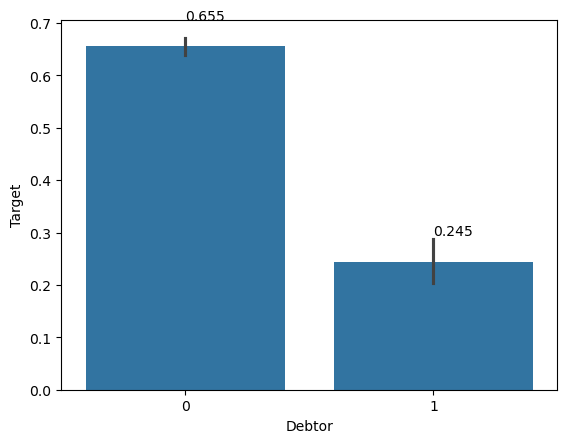

In [86]:
a=sns.barplot(data=data, x=data["Debtor"],y=data["Target"])
for g in a.patches:
   a.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

- From this barplot we can see that The people who are not in dept are more likely to graduate with 65% where as the among people who are in dept just 25% are likely to graduate

- lets have a look at how age affect on graduation

<Axes: xlabel='Age at enrollment', ylabel='Target'>

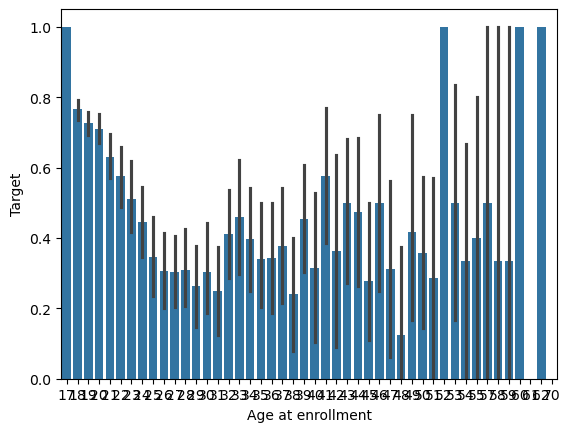

In [87]:
sns.barplot( x=data["Age at enrollment"],y=data["Target"], lw=1)

In [88]:
data["Age at enrollment"].unique()

array([20, 19, 45, 50, 18, 22, 21, 34, 37, 43, 55, 39, 29, 24, 27, 23, 33,
       35, 25, 26, 44, 36, 28, 38, 30, 47, 31, 32, 40, 48, 49, 46, 41, 70,
       60, 53, 51, 52, 54, 42, 61, 58, 59, 17, 57, 62], dtype=int64)

- instead of having all the solo value lets group them so we can visualize easily

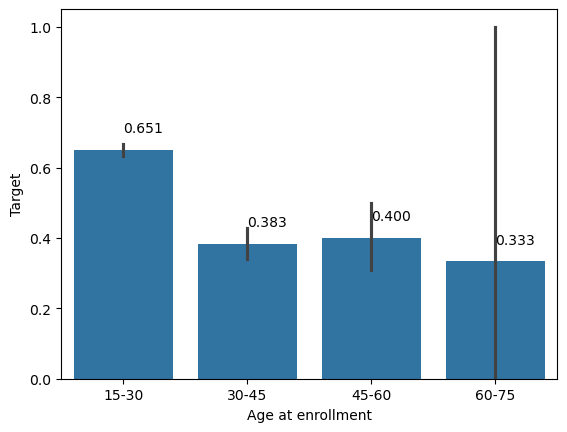

In [89]:
age_bins=[15,30,45,60,75]
a = pd.cut(data["Age at enrollment"], bins=age_bins, labels=['15-30', '30-45','45-60','60-75'])

bp=sns.barplot(x=a, y='Target', data=data)
for g in bp.patches:
   bp.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

- It looks like student from age 15-30 have the highest rate of graduation May be they are kicked from the house if they dropout just kidding

- Lets see if student with scholarship are graduating or not

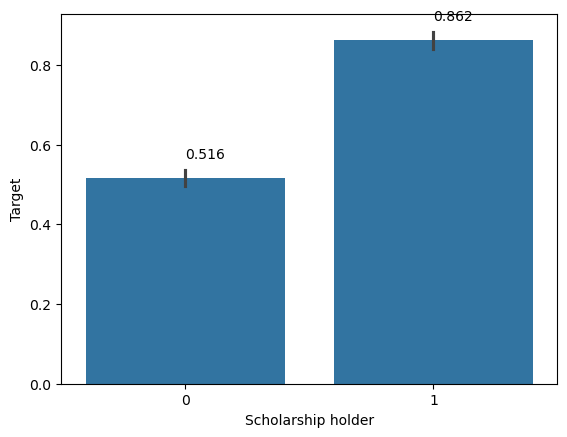

In [90]:
a=sns.barplot(data=data, x=data["Scholarship holder"],y=data["Target"])
for g in a.patches:
   a.annotate(format(g.get_height(), '.3f'),(g.get_x() + g.get_width() / 2., g.get_height()+.05))

- it looks like the student with scholarship are more likely to graduate


So by visualizing through graph we can see which column has what kind of impact on the result.
In this example i have just used a simple bar graph because my data were a bit simple/descrete. but there are many other visualization graph out there like line graph, histogram and many more

3. Choosing a Model

    There are many training model that are used to train AI. Since we are dealing with a yes or no question i am using a logistic regression model since its output probabilities are 0 and 1.

4. Training Model

    After choosing your model, the next step is to split your data into training and testing sets—commonly a 70-30 split. 

In [91]:
#Here X is the data and y is the output
X, y = data.drop('Target', axis=1), data['Target'].values

- after spliting we feed then to the algorithm so that the AI can be trained

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=87)

In [93]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

4. Evaluation of the model:

    once the Ai is train we need to see how accurate the AI is 

In [94]:
predictions = logmodel.predict( X_test)
logmodel.score(X_test, y_test)

0.8367768595041323

- Looks like our AI is 83% accurate depending upon the model used to train or the data some time the accuracy may be higher or lower


- Let look at more specifics accuracy

In [95]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report

#Print the classification report for the model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77       582
           1       0.81      0.95      0.87       870

    accuracy                           0.84      1452
   macro avg       0.85      0.81      0.82      1452
weighted avg       0.85      0.84      0.83      1452



- from the above numbers we can se the True positive, True Negative, False positive, false negative and other detail so we can analysis how accurate it is to make further improvement

6. Making a prediction
    So finally after all the AI training lets see if i graduate from my course or not

In [96]:
myTest = {
        'Course':[20],  #Number of courses in your degree may be 6-5 per sem
        'Daytime/evening attendance':[0],   # 0 for day 1 for evening
        'Displaced':[0], #0 for not displaced 1 for displaced
        'Educational special needs':[0],  #0 for no 1 for yes
        'Debtor':[0], #0 if you are not in debt 1 if you are in debt
        'Tuition fees up to date':[1], #1 if tution uptodate 0 if not
        'Gender':[0], #0 male 1 female we dont have other here
        'Scholarship holder':[0], #1 if you have scholorship 0 if not
        'Age at enrollment':[20],  #age
        'International':[1], #0 if domestic student 1 if international
        'Curricular units 1st sem (grade)':[3.38],  #1st sem gpa
        'Curricular units 2nd sem (grade)':[3.91],   #2nd sem gpa
       }
df = pd.DataFrame(myTest)
if logmodel.predict(df)==0:
    print("Most likely you are not going to graduate")
else:
    print("Most likely you will graduate")


Most likely you will graduate


# Looks like i am graduating 
